In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Read local .csv dataset
source = pd.read_csv('EU_Database.csv')

In [3]:
source

,Country,NUTS1_ID,NUTS2 code+name,NUTS2_ID,NUTS2_name,Fund,Year,Programming_Period,EU_Payment_annual,Modelled_annual_expenditure,Standard_Deviation_of_annual_expenditure,Standard_Error_of_modelled_annual_expenditure
0,BE,BE1,BE10 Région de Bruxelles-Capitale/Brussels Hoo...,BE10,Région de Bruxelles-Capitale / Brussels Hoofds...,ERDF,1990,1989-1993,0,3253,4051,128
1,BE,BE1,BE10 Région de Bruxelles-Capitale/Brussels Hoo...,BE10,Région de Bruxelles-Capitale / Brussels Hoofds...,ERDF,1991,1989-1993,2716,31593,3906,123
2,BE,BE1,BE10 Région de Bruxelles-Capitale/Brussels Hoo...,BE10,Région de Bruxelles-Capitale / Brussels Hoofds...,ERDF,1992,1989-1993,52902,23647,3391,107
3,BE,BE1,BE10 Région de Bruxelles-Capitale/Brussels Hoo...,BE10,Région de Bruxelles-Capitale / Brussels Hoofds...,ERDF,1993,1989-1993,0,9622,2076,65
4,BE,BE1,BE10 Région de Bruxelles-Capitale/Brussels Hoo...,BE10,Région de Bruxelles-Capitale / Brussels Hoofds...,ERDF,1994,1989-1993,13552,18910,3154,99
...,...,...,...,...,...,...,...,...,...,...,...,...
34765,UK,UKM,UKM6 Highlands and Islands,UKM6,Highlands and Islands,YEI,2014,2014-2020,0,4829,8406,265
34766,UK,UKM,UKM6 Highlands and Islands,UKM6,Highlands and Islands,YEI,2015,2014-2020,0,20053,20182,638
34767,UK,UKM,UKM6 Highlands and Islands,UKM6,Highlands and Islands,YEI,2016,2014-2020,0,64253,38175,1207
34768,UK,UKM,UKM6 Highlands and Islands,UKM6,Highlands and Islands,YEI,2017,2014-2020,0,200615,55848,1766


In [4]:
# 1 
# Each year's funding amount and spend
# Create 2 dictionaries, key is year, value is total funding each year
# and total expense each year, respectively
di_fund = {}
di_spend = {}
for i in range(len(source)):
  if source.iloc[i]['Year'] not in di_fund:
    di_fund[source.iloc[i]['Year']] = source.iloc[i]['EU_Payment_annual']
  else:
    di_fund[source.iloc[i]['Year']] += source.iloc[i]['EU_Payment_annual']
  if source.iloc[i]['Year'] not in di_spend:
    di_spend[source.iloc[i]['Year']] = source.iloc[i]['Modelled_annual_expenditure']
  else:
    di_spend[source.iloc[i]['Year']] += source.iloc[i]['Modelled_annual_expenditure']

In [5]:
di_fund

{1990: 2102263233,
 1991: 2312893403,
 1992: 9686972165,
 1993: 10183823644,
 1994: 9341401689,
 1995: 12544422929,
 1996: 15607047671,
 1997: 17393520251,
 1998: 18228647618,
 2002: 23102613792,
 1989: 261098043,
 2003: 27195899405,
 2000: 20122082580,
 1999: 16854691158,
 1987: 57211534,
 1988: 93716865,
 1986: 7603500,
 2001: 20774606147,
 2007: 45884986708,
 2006: 31442171852,
 2004: 31784660026,
 2005: 31384445897,
 2009: 42071340813,
 2012: 60484559120,
 2013: 68520447297,
 2008: 45292394821,
 2014: 61638131000,
 2011: 54027561518,
 2010: 48001843440,
 2015: 52099680910,
 2018: 56703170145,
 2017: 37431192799,
 2016: 35958819142}

In [6]:
di_spend

{1990: 2158082272,
 1991: 4101818953,
 1992: 9791697157,
 1993: 8389497410,
 1994: 12264000074,
 1995: 13556241008,
 1996: 16527373395,
 1997: 17959770591,
 1998: 18711627024,
 2002: 28121213236,
 1989: 745441673,
 2003: 27339837875,
 2000: 21579949473,
 1999: 16426518347,
 1987: 57211534,
 1988: 93716865,
 1986: 7603500,
 2001: 22438815915,
 2007: 49557734163,
 2006: 32965689672,
 2004: 31452224931,
 2005: 33289143136,
 2009: 51758779253,
 2012: 64176065578,
 2013: 65162594737,
 2008: 45688642601,
 2014: 63133336497,
 2011: 56484955321,
 2010: 47811098015,
 2015: 55368932478,
 2018: 28805281106,
 2017: 37778522105,
 2016: 24890889773}

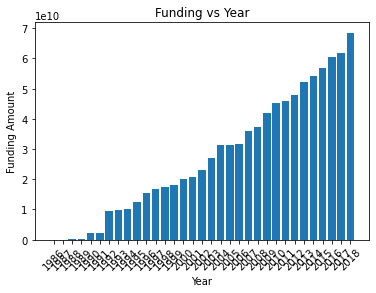

In [7]:
# Plot fund vs. year
di_fund_names = sorted(list(di_fund.keys()))
di_fund_values = sorted(list(di_fund.values()))

plt.bar(range(len(di_fund)), di_fund_values, tick_label=di_fund_names)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Funding Amount")
plt.title('Funding vs Year')
plt.show()

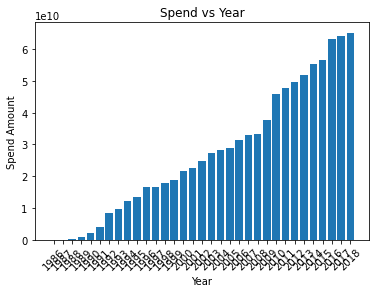

In [8]:
# Plot spend vs. year
di_spend_names = sorted(list(di_spend.keys()))
di_spend_values = sorted(list(di_spend.values()))

plt.bar(range(len(di_spend)), di_spend_values, tick_label=di_spend_names)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Spend Amount")
plt.title('Spend vs Year')
plt.show()

In [9]:
# 2
# Top 10 fund ID and payment
di_id_payment = {}
for i in range(len(source)):
  if source.iloc[i]['NUTS2_ID'] not in di_id_payment:
    di_id_payment[source.iloc[i]['NUTS2_ID']] = source.iloc[i]['EU_Payment_annual']
  else:
    di_id_payment[source.iloc[i]['NUTS2_ID']] += source.iloc[i]['EU_Payment_annual']

In [10]:
# Sort di_id_payment based on value from the largest to the smallest
di_id_payment_sorted = sorted(di_id_payment.items(),key=lambda di_id_payment:di_id_payment[1], reverse = True)
di_id_payment_sorted

[('ES61', 35364984646),
 ('PT11', 26203180310),
 ('PT16', 18262760036),
 ('ITF3', 18093537771),
 ('ITG1', 17699950125),
 ('PL12', 16091505249),
 ('ES11', 15088681938),
 ('EL30', 13412453491),
 ('ES41', 13151019858),
 ('ITF4', 13089983430),
 ('ES52', 12660413685),
 ('LT00', 12593932173),
 ('ES42', 11176599233),
 ('PL22', 10961332993),
 ('IE02', 10581593783),
 ('EL52', 10494911794),
 ('DEE0', 10342300603),
 ('PT17', 10318185241),
 ('ES51', 9887000179),
 ('DE40', 9786475487),
 ('ES43', 9334831551),
 ('PT18', 9291343319),
 ('DEG0', 9215873548),
 ('PL21', 8970833810),
 ('ITF6', 8836884452),
 ('PL51', 8570080721),
 ('PL11', 8225955900),
 ('PL41', 8172113714),
 ('LV00', 8127294195),
 ('DE80', 8096563036),
 ('PL32', 7852860856),
 ('EL51', 7703843233),
 ('PL31', 7646285923),
 ('HU32', 7291588032),
 ('ES70', 7165735142),
 ('EL61', 6787034249),
 ('PL63', 6716776113),
 ('HU10', 6698025240),
 ('HU33', 6627459973),
 ('EL63', 6427002675),
 ('DED2', 6204370498),
 ('ES30', 6141610540),
 ('ITG2', 610966

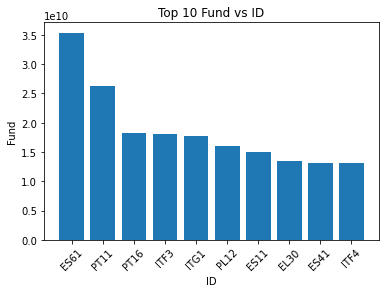

In [11]:
# Plot Top 10 fund vs. id
di_id_payment_top10 = di_id_payment_sorted[:10]
top10_id = []
top10_fund = []
for i in range(len(di_id_payment_top10)):
    top10_id.append(di_id_payment_top10[i][0])
    top10_fund.append(di_id_payment_top10[i][1])

plt.bar(range(10), top10_fund, tick_label=top10_id)
plt.xticks(rotation=45)
plt.xlabel("ID")
plt.ylabel("Fund")
plt.title('Top 10 Fund vs ID')
plt.show()

In [12]:
# 3
# Fund usage analysis, check whether each fund is nearly 100% used
di_id_spend = {}
for i in range(len(source)):
  if source.iloc[i]['NUTS2_ID'] not in di_id_spend:
    di_id_spend[source.iloc[i]['NUTS2_ID']] = source.iloc[i]['Modelled_annual_expenditure']
  else:
    di_id_spend[source.iloc[i]['NUTS2_ID']] += source.iloc[i]['Modelled_annual_expenditure']

In [13]:
di_id_usage = {}
for id in di_id_spend.keys():
    di_id_usage[id] = round(di_id_payment[id] / di_id_spend[id], 3)
di_id_usage

{'BE10': 1.0,
 'BE21': 1.0,
 'BE22': 1.0,
 'BE23': 1.0,
 'BE24': 1.0,
 'BE25': 1.0,
 'BE31': 1.0,
 'BE32': 1.0,
 'BE33': 1.0,
 'BE34': 1.0,
 'BE35': 1.0,
 'DE11': 1.0,
 'DE12': 1.0,
 'DE13': 1.0,
 'DE14': 1.0,
 'DE21': 1.0,
 'DE22': 1.0,
 'DE23': 1.0,
 'DE24': 1.0,
 'DE25': 1.0,
 'DE26': 1.0,
 'DE27': 1.0,
 'DE30': 1.0,
 'DE40': 1.0,
 'DE50': 1.0,
 'DE60': 1.0,
 'DE71': 1.0,
 'DE72': 1.0,
 'DE73': 1.0,
 'DE80': 1.0,
 'DE91': 1.0,
 'DE92': 1.0,
 'DE93': 1.0,
 'DE94': 1.0,
 'DEA1': 1.0,
 'DEA2': 1.0,
 'DEA3': 1.0,
 'DEA4': 1.0,
 'DEA5': 1.0,
 'DEB1': 1.0,
 'DEB2': 1.0,
 'DEB3': 1.0,
 'DEC0': 1.0,
 'DED2': 1.0,
 'DED4': 1.0,
 'DED5': 1.0,
 'DEE0': 1.0,
 'DEF0': 1.0,
 'DEG0': 1.0,
 'DK01': 1.0,
 'DK02': 1.0,
 'DK03': 1.0,
 'DK04': 1.0,
 'DK05': 1.0,
 'EL30': 1.0,
 'EL41': 1.0,
 'EL42': 1.0,
 'EL43': 1.0,
 'EL51': 1.0,
 'EL52': 1.0,
 'EL53': 1.0,
 'EL54': 1.0,
 'EL61': 1.0,
 'EL62': 1.0,
 'EL63': 1.0,
 'EL64': 1.0,
 'EL65': 1.0,
 'ES11': 1.0,
 'ES12': 1.0,
 'ES13': 1.0,
 'ES21': 1.0,
 'ES22

In [14]:
# 4
# Which country receives the most amount of funds? (i.e. which country is preferred by the funding giver?)
country_fund_amount = {}
for i in range(len(source)):
    if source.iloc[i]['Country'] not in country_fund_amount:
        country_fund_amount[source.iloc[i]['Country']] = source.iloc[i]['EU_Payment_annual']
    else:
        country_fund_amount[source.iloc[i]['Country']] += source.iloc[i]['EU_Payment_annual']

In [15]:
# Sort country_fund_amount based on value from the largest to the smallest
country_fund_amount_sorted = sorted(country_fund_amount.items(),key=lambda country_fund_amount:country_fund_amount[1], reverse = True)
country_fund_amount_sorted

[('ES', 146504099184),
 ('PL', 113557046868),
 ('IT', 92204111211),
 ('DE', 85674801158),
 ('PT', 75850778370),
 ('EL', 72833812742),
 ('FR', 52637223301),
 ('UK', 41281923176),
 ('HU', 38117936595),
 ('CZ', 35725985229),
 ('RO', 32113594526),
 ('SK', 17692364469),
 ('IE', 15705918321),
 ('LT', 12593932173),
 ('BG', 11466185722),
 ('AT', 9474054177),
 ('FI', 8331168168),
 ('LV', 8127294195),
 ('SE', 7129568470),
 ('NL', 6288452958),
 ('SI', 6266615944),
 ('BE', 6253816489),
 ('EE', 6029326151),
 ('DK', 2226897145),
 ('HR', 1953045242),
 ('CY', 1145406521),
 ('MT', 1086155469),
 ('LU', 324407141)]

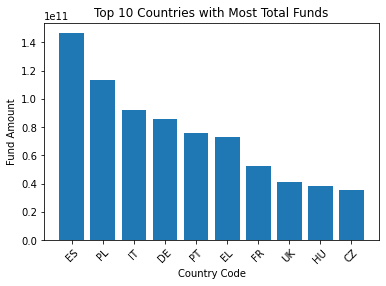

In [16]:
# Plot Countries with Top 10 fund
country_fund_amount_top10 = country_fund_amount_sorted[:10]
top10_country = []
top10_amount = []
for i in range(len(country_fund_amount_top10)):
    top10_country.append(country_fund_amount_top10[i][0])
    top10_amount.append(country_fund_amount_top10[i][1])

plt.bar(range(10), top10_amount, tick_label=top10_country)
plt.xticks(rotation=45)
plt.xlabel("Country Code")
plt.ylabel("Fund Amount")
plt.title('Top 10 Countries with Most Total Funds')
plt.show()